In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.colors import BoundaryNorm
import matplotlib.colors as colors
import numpy as np
import os

Get heat flux

In [3]:
diri = r'C:\Users\apbarret\Documents\data\BeringStraitHeatFlux'
fili = r'BeringStrait_Monthlymeans_HEAT_Oct2017.txt'
df = pd.read_csv(os.path.join(diri, fili), header=None, comment='%',sep='\s+', #skiprows=55,
                 names=['Mooring', 'Year', 'Month', 'Mean', 'Error', 'MeanCorr', 'CorrErr'],
                 parse_dates={'date': ['Year', 'Month']}, index_col='date')
heat = df['Mean'].values.reshape(-1,12)
heat_year = np.unique(df.index.year)
heat_month = np.unique(df.index.month)

heat

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  9. ,  9.4,  4.6,
         1.2],
       [ 0.2,  0. ,  0.1,  0.2,  0.8,  8.9, 11.4, 16.4, 16.1, 12.7,  9.8,
         0.3],
       [ 0.6,  0.7,  0.4,  0.6,  2.7, 12.1, 21.8, 12.7, -0.3,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 24.6, 14.7, 16.1, 13.2,
         0.3],
       [ 0.2,  0.3,  0.5,  0.4,  0.8,  7.5, 13.6,  8.9, 19.1, 16.2, 11.2,
         1.3],
       [ 0.2,  0.3,  0.2,  0.2,  0.6,  nan, 21.8, 17.6,  6.9, 10.4,  4.7,
         0.1],
       [ 0. ,  0.2,  0.1,  0.1,  1.4,  4.4,  9.4, 14. , 10.4,  5.7,  9.7,
         3.1],
       [ 0.1,  0.5,  

Get temperature

In [4]:
diri = r'C:\Users\apbarret\Documents\data\BeringStraitHeatFlux'
fili = r'BeringStrait_Monthlymeans_TEMPERATURE_Oct2017.txt'
df = pd.read_csv(os.path.join(diri, fili), header=None, comment='%',sep='\s+', #skiprows=55,
                 names=['Mooring', 'Year', 'Month', 'Mean', 'Error', 'MeanCorr', 'CorrErr'],
                 parse_dates={'date': ['Year', 'Month']}, index_col='date')
temperature = df['Mean'].values.reshape(-1,12)
temp_year = np.unique(df.index.year)
temp_month = np.unique(df.index.month)

Get transport

In [5]:
diri = r'C:\Users\apbarret\Documents\data\BeringStraitHeatFlux'
fili = r'BeringStrait_Monthlymeans_TRANSPORT_Oct2017.txt'
df = pd.read_csv(os.path.join(diri, fili), header=None, comment='%',sep='\s+', #skiprows=55,
                 names=['Mooring', 'Year', 'Month', 'Mean', 'Error', 'MeanCorr', 'CorrErr'],
                 parse_dates={'date': ['Year', 'Month']}, index_col='date')
transport = df['Mean'].values.reshape(-1,12)
trans_year = np.unique(df.index.year)
trans_month = np.unique(df.index.month)

Text(0.5,1,'Transport')

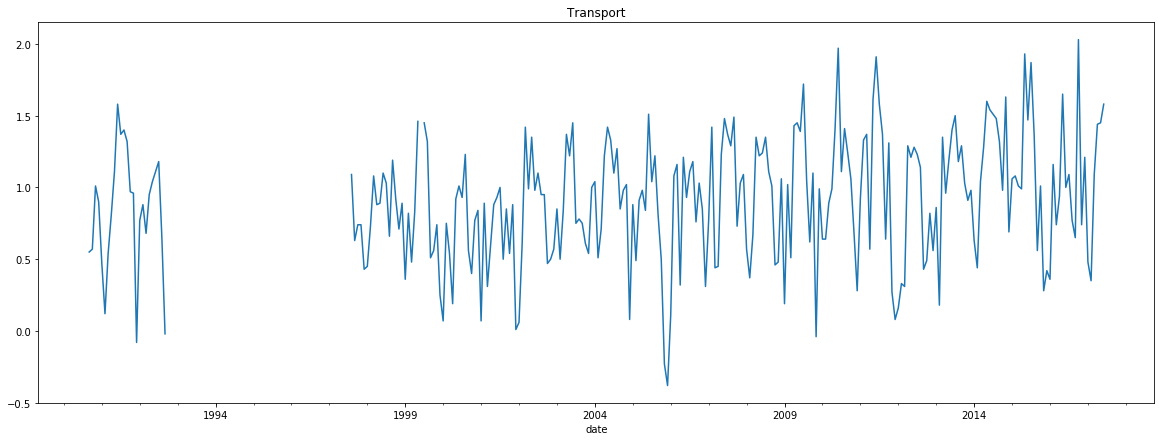

In [6]:
fig, ax = plt.subplots(figsize=(20,7))
df['Mean'].plot(ax=ax)
ax.set_title('Transport')

In [7]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [19]:
def plot_hovmoller(x, y, z, cmap=None, norm=None, add_colorbar=False, ax=None, title=None, 
                   units=None, cb_extend='neither', fill_missing=False):
    """
    Plots a Hovmoller for an array
    
    Arguments
    ---------
    x - x-axis values for plot
    y - y-axis values for plot
    z - values for hovmoller
    """
    
    ny, nx = z.shape
    
    if not ax:
        ax = plt.subplot(111)
        
    im = ax.pcolormesh(z, cmap=cmap, norm=norm)
    
    if add_colorbar:
        cbar = fig.colorbar(im, ax=ax, extend=cb_extend)
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=15)
        if units: cbar.ax.set_ylabel(units, fontsize=20)
        
    ax.set_yticks(np.arange(0.5,ny,1.))
    ax.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=20)
    ax.set_xticks(np.arange(0.5,nx,5))
    ax.set_xticklabels(x[::5], fontsize=20)

    if fill_missing: 
        cmap.set_bad('white', 0.)  # Set missing values to transparent
        ax.patch.set(hatch='x', edgecolor='0.8')  # Plots x-hatch underneath axis 
        
    if title: ax.set_title(title, fontsize=25)

In [20]:
def standardize(x):
    return (x - np.nanmean(x, axis=1)[:,np.newaxis])/np.nanstd(x, axis=1)[:,np.newaxis]
#print (heat.T - np.nanmean(heat.T, axis=1)[:,np.newaxis]/np.nanstd(heat.T, axis=1)[:,np.newaxis])
#heat.T - np.tile(np.nanmean(heat.T, axis=1), (28,1)).T

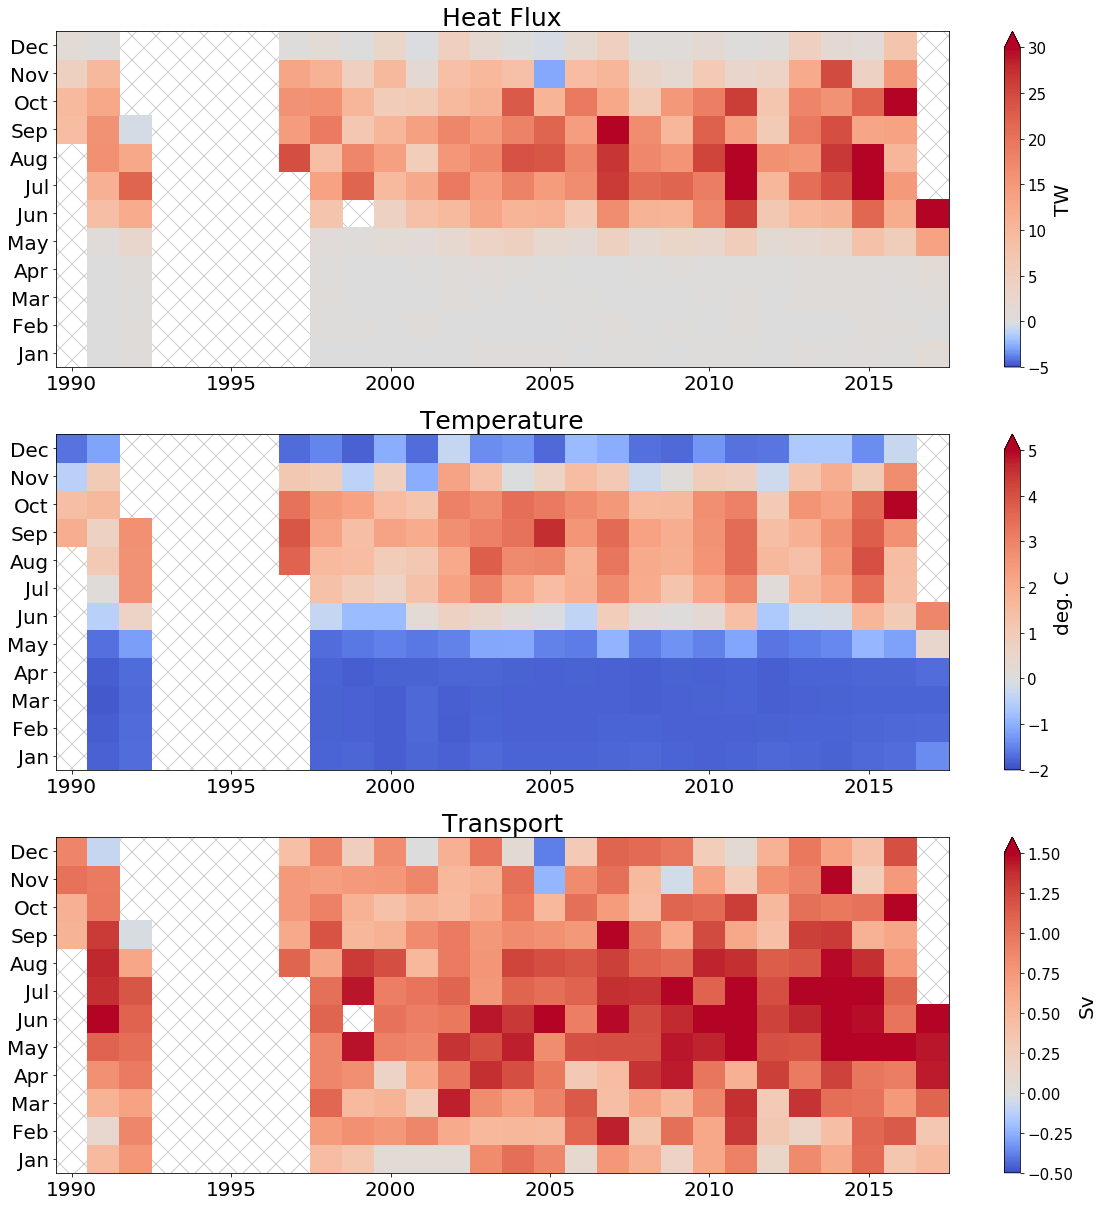

In [21]:
colormap = 'coolwarm'

fig, ax = plt.subplots(3, 1, figsize=(20,21))

cmap = plt.get_cmap(colormap)

heat_norm = MidpointNormalize(midpoint=0., vmin=-5, vmax=30.)
plot_hovmoller(heat_year, heat_month, heat.T, cmap=cmap, norm=heat_norm, add_colorbar=True, 
               title='Heat Flux', units='TW', ax=ax[0], cb_extend='max',
               fill_missing=True)

temp_norm = MidpointNormalize(midpoint=0., vmin=-2, vmax=5.)
plot_hovmoller(temp_year, temp_month, temperature.T, cmap=cmap, norm=temp_norm, add_colorbar=True, 
               title='Temperature', units='deg. C', ax=ax[1], cb_extend='max',
               fill_missing=True)

trans_norm = MidpointNormalize(midpoint=0., vmin=-0.5, vmax=1.5)
plot_hovmoller(trans_year, trans_month, transport.T, cmap=cmap, norm=trans_norm, add_colorbar=True, 
               title='Transport', units='Sv', ax=ax[2], cb_extend='max',
               fill_missing=True)

fig.savefig(os.path.join(diri, 'BeringStrait_HeatFlux.png'))

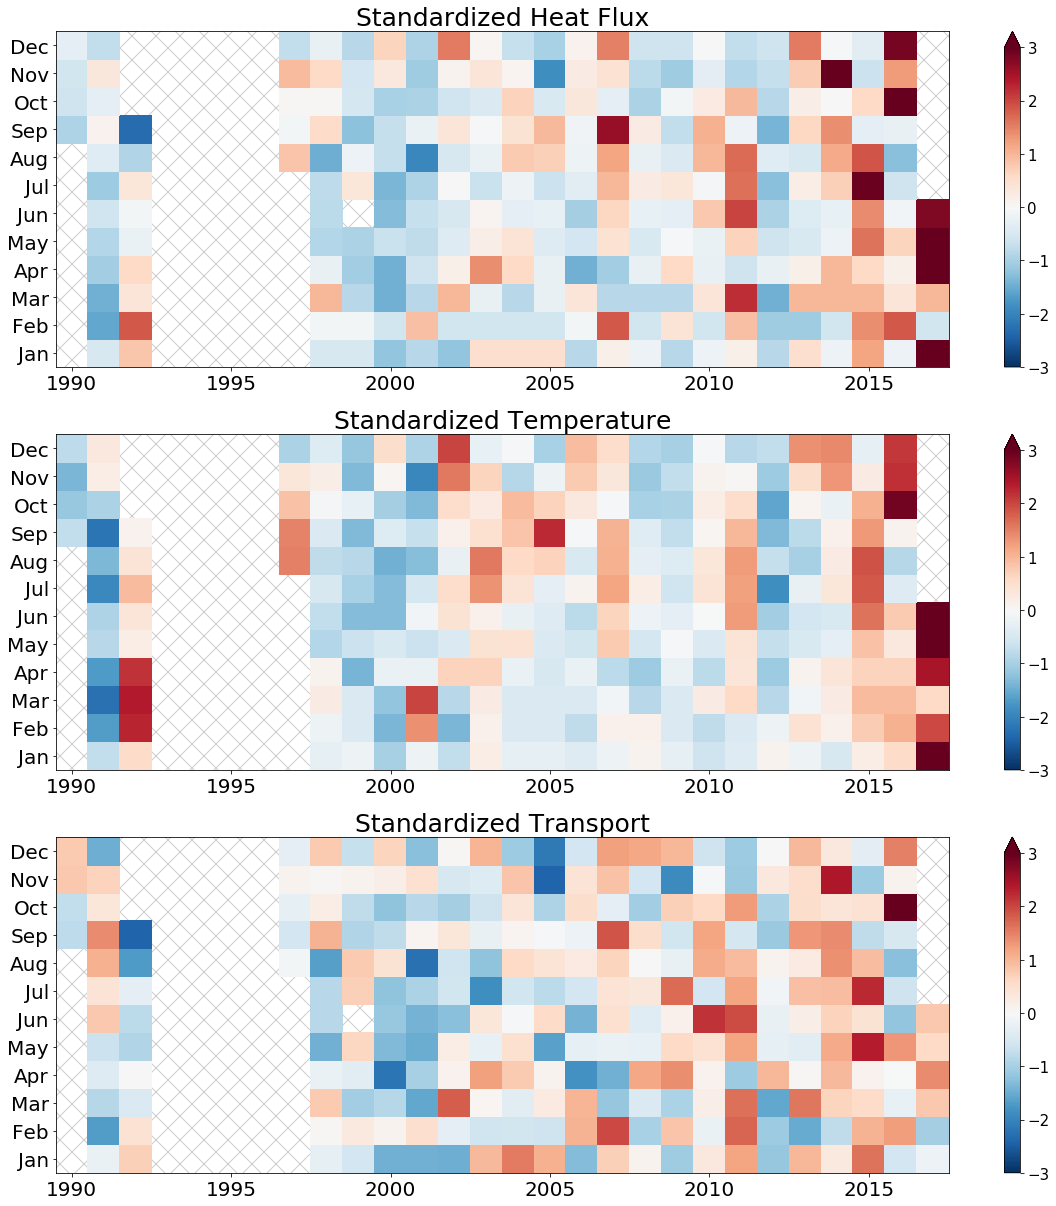

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(20,21))

cmap = plt.get_cmap('RdBu_r')
cmap.set_bad('0.5')

heat_norm = MidpointNormalize(midpoint=0., vmin=-3, vmax=3.)
plot_hovmoller(heat_year, heat_month, standardize(heat.T), cmap=cmap, norm=heat_norm, add_colorbar=True, 
               title='Standardized Heat Flux', units=None, ax=ax[0], cb_extend='max',
               fill_missing=True)

temp_norm = MidpointNormalize(midpoint=0., vmin=-3, vmax=3.)
plot_hovmoller(temp_year, temp_month, standardize(temperature.T), cmap=cmap, norm=temp_norm, add_colorbar=True, 
               title='Standardized Temperature', units=None, ax=ax[1], cb_extend='max',
               fill_missing=True)

trans_norm = MidpointNormalize(midpoint=0., vmin=-3., vmax=3.)
plot_hovmoller(trans_year, trans_month, standardize(transport.T), cmap=cmap, norm=trans_norm, add_colorbar=True, 
               title='Standardized Transport', units=None, ax=ax[2], cb_extend='max',
               fill_missing=True)

fig.savefig(os.path.join(diri, 'BeringStrait_HeatFlux_standardized.png'))

In [29]:
pd.DataFrame(standardize(heat.T).T, index=heat_year, columns=heat_month).to_csv(os.path.join(diri, 'BeringStrait_Monthlymeans_HEAT_Oct2017.standardized.csv'))

In [30]:
pd.DataFrame(standardize(temperature.T).T, index=temp_year, columns=temp_month).to_csv(os.path.join(diri, 'BeringStrait_Monthlymeans_TEMPERATURE_Oct2017.standardized.csv'))

In [31]:
pd.DataFrame(standardize(transport.T).T, index=trans_year, columns=trans_month).to_csv(os.path.join(diri, 'BeringStrait_Monthlymeans_TRANSPORT_Oct2017.standardized.csv'))